In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

# Loading Amazon UK product dataset 
import os

# Find a CSV file in the downloaded dataset directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
	df = pd.read_csv(os.path.join(path, csv_files[0]))
else:
	raise FileNotFoundError("No CSV file found in the dataset directory.")

C:\Users\anais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\anais\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [2]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

1-Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [3]:
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])


# Add a proportion column: proportion of best-sellers (assuming isBestSeller == True or 1)
crosstab_result['best_seller_proportion'] = crosstab_result[True] / crosstab_result.sum(axis=1)

# Sort categories by the proportion of best-sellers
crosstab_sorted = crosstab_result.sort_values(by='best_seller_proportion', ascending=False)


crosstab_sorted.head(10)  # Displaying the top 10 categories by best-seller proportion

isBestSeller,False,True,best_seller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


A: Yes, It's more prevalent is Grocery, Smart Home Security & Lighting, Health & Personal Care and Mobile Phone Accessories categories

2-Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

In [4]:
from scipy.stats import chi2_contingency

# Chi-square test for 'categories' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(np.float64(36684.23786636857), np.float64(0.0))

A: The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low \( p \)-value or 0, we reject the null hypothesis. This implies that there's a significant association between `category` and `isBestSeller` in the dataset.

In [32]:
from scipy.stats.contingency import association

# Crosstab (only counts)
crosstab_counts = pd.crosstab(df['category'], df['isBestSeller']).astype(int)

# Computing the association between variables in 'crosstab_result' using the "cramer" method

cramer_v = association(crosstab_counts, method="cramer")
cramer_v


0.1222829439760564

A: There's a weak relationship between the best seller status and category.

3-Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

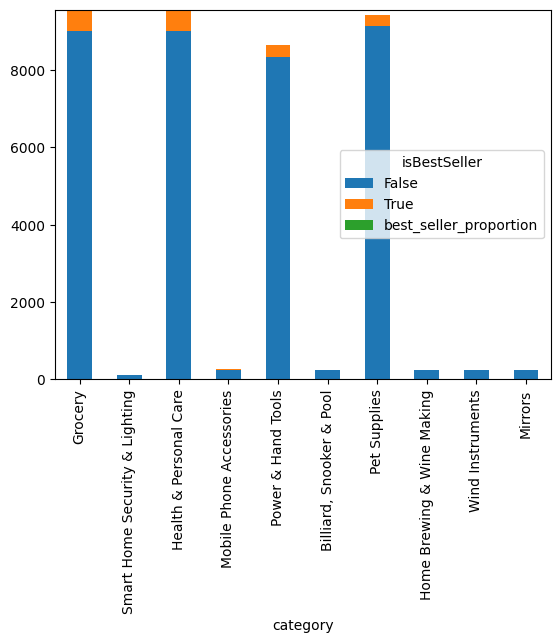

In [6]:
crosstab_result_10 = crosstab_sorted.head(10)
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result_10.plot(kind="bar", stacked=True)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

0-Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [7]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


1-Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

C:\Users\anais\AppData\Local\Temp\ipykernel_32056\2355316524.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top20, x='category', y='price', palette='coolwarm')


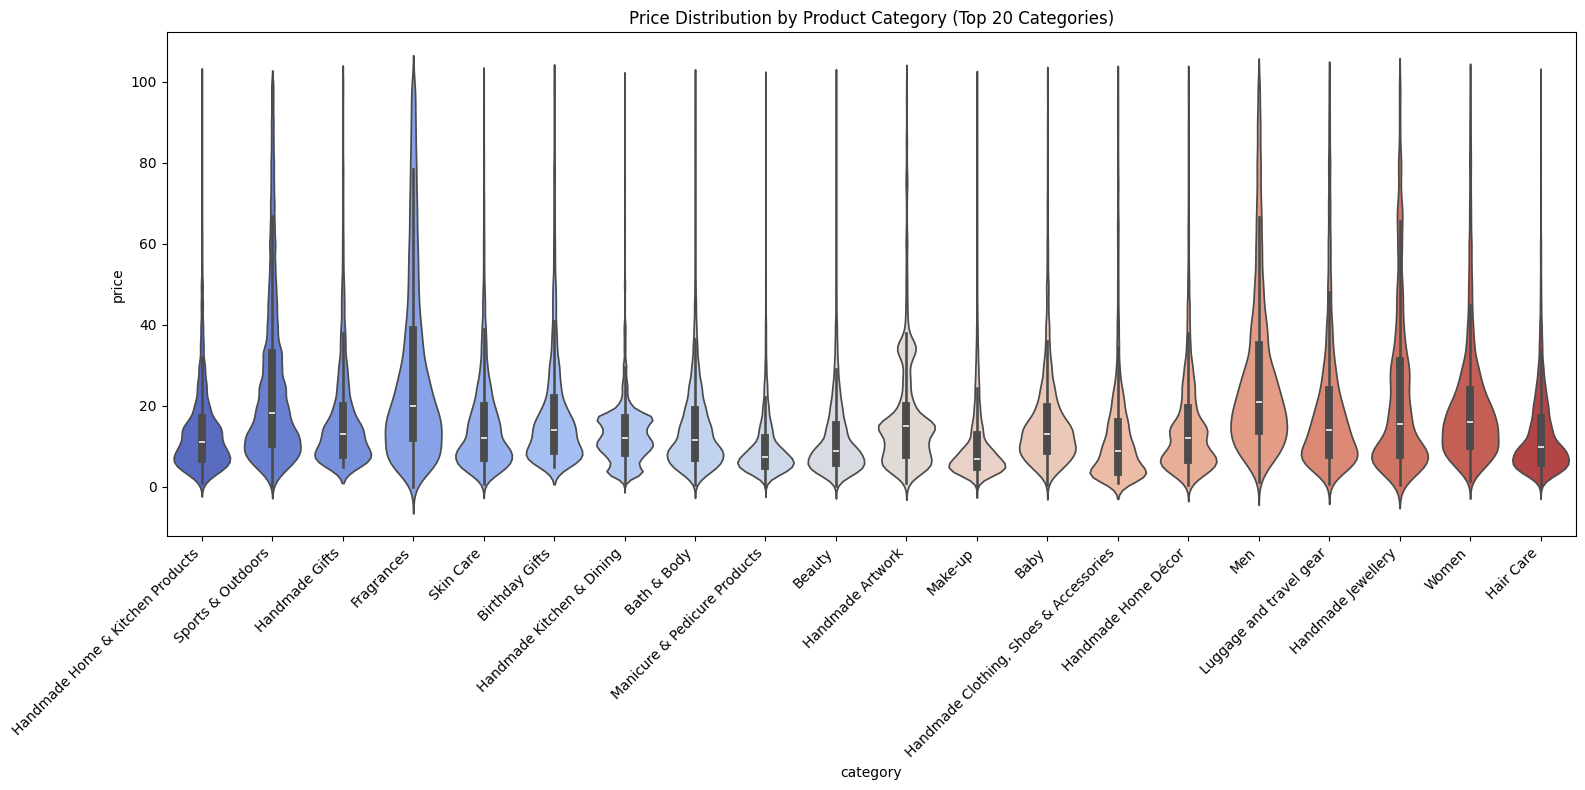

In [8]:
# Get top 20 categories by count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

# Filter the dataframe
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Plot violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(data=df_top20, x='category', y='price', palette='coolwarm')

plt.title("Price Distribution by Product Category (Top 20 Categories)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:
# Get the median price per category, sorted descending
sorted_median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
sorted_median_prices.head(5)

category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64

A: Desktop PCs 

2-Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

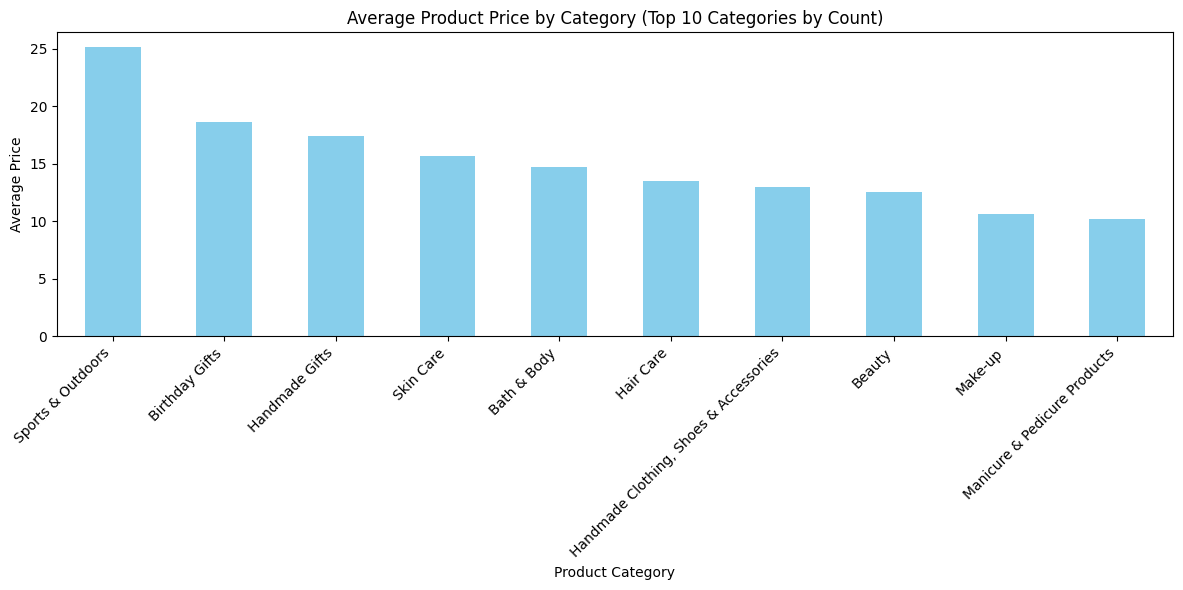

In [10]:

# Get top 10 product categories by number of entries
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

# Filter to include only those top 10 categories
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Compute average price per category
avg_price_per_category = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
avg_price_per_category.plot(kind='bar', color='skyblue')

plt.title("Average Product Price by Category (Top 10 Categories by Count)")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


A: Sports & Outdoors

3-Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\anais\AppData\Local\Temp\ipykernel_32056\1303002324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='category', y='stars', palette="coolwarm")


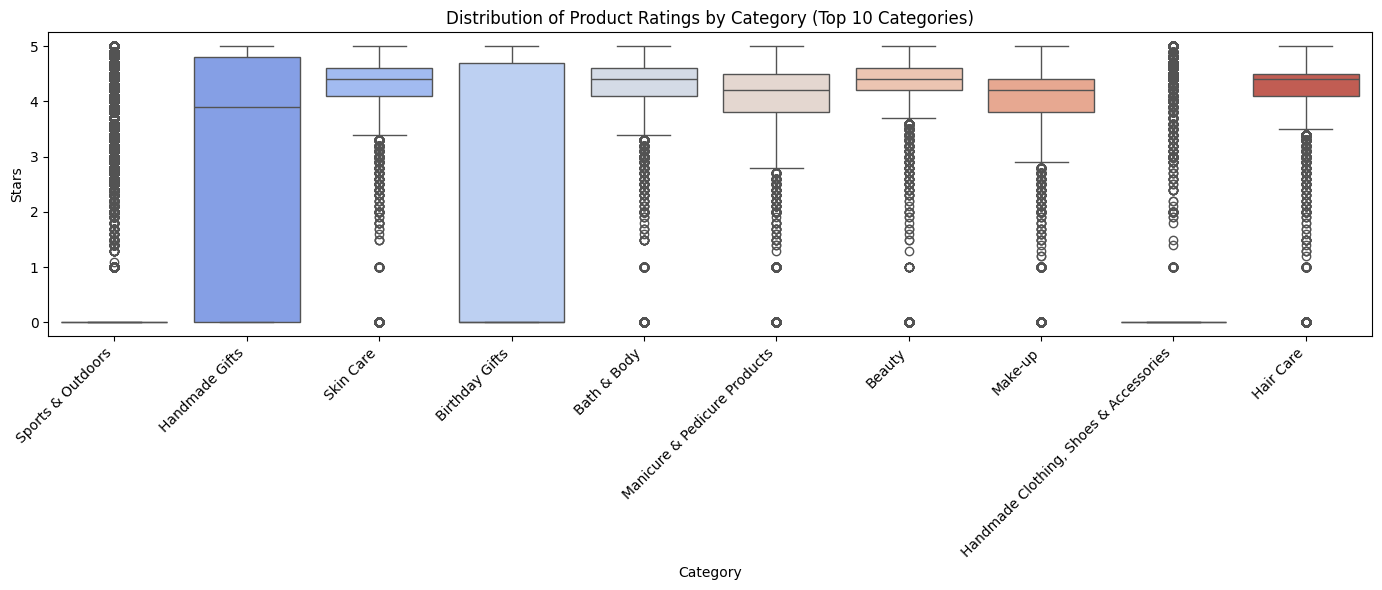

In [11]:
# Plot side-by-side boxplots for rating distribution per category
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top10, x='category', y='stars', palette="coolwarm")

plt.title("Distribution of Product Ratings by Category (Top 10 Categories)")
plt.xlabel("Category")
plt.ylabel("Stars")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
# Get the median rating per category, sorted descending
sorted_median_prices = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
sorted_median_prices.head(5)

category
Computer Memory          4.7
Kids' Play Figures       4.6
Beer, Wine & Spirits     4.6
Office Paper Products    4.6
Luxury Food & Drink      4.6
Name: stars, dtype: float64

A: Computer Memory has the highest median rating.

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

1-Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [13]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = df['price'].corr(df['stars'])
correlation

np.float64(-0.12490673262148641)

In [ ]:
# Calculating the Spearman rank correlation between 'price' and 'stars' columns
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

np.float64(-0.13316425462433912)

A: Since the values are close to 0 implies little to no linear/monotonic correlation between the two variables.

2-Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='stars', ylabel='price'>

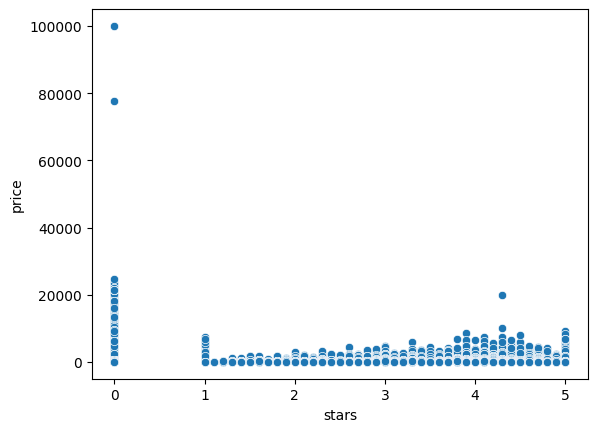

In [15]:
# Plotting a scatter plot to visualize the relationship between 'stars' and 'price'
sns.scatterplot(data=df, x='stars', y='price')

A: Porducts with a lower range of price tend to be rated and the most expensive products are not rated.

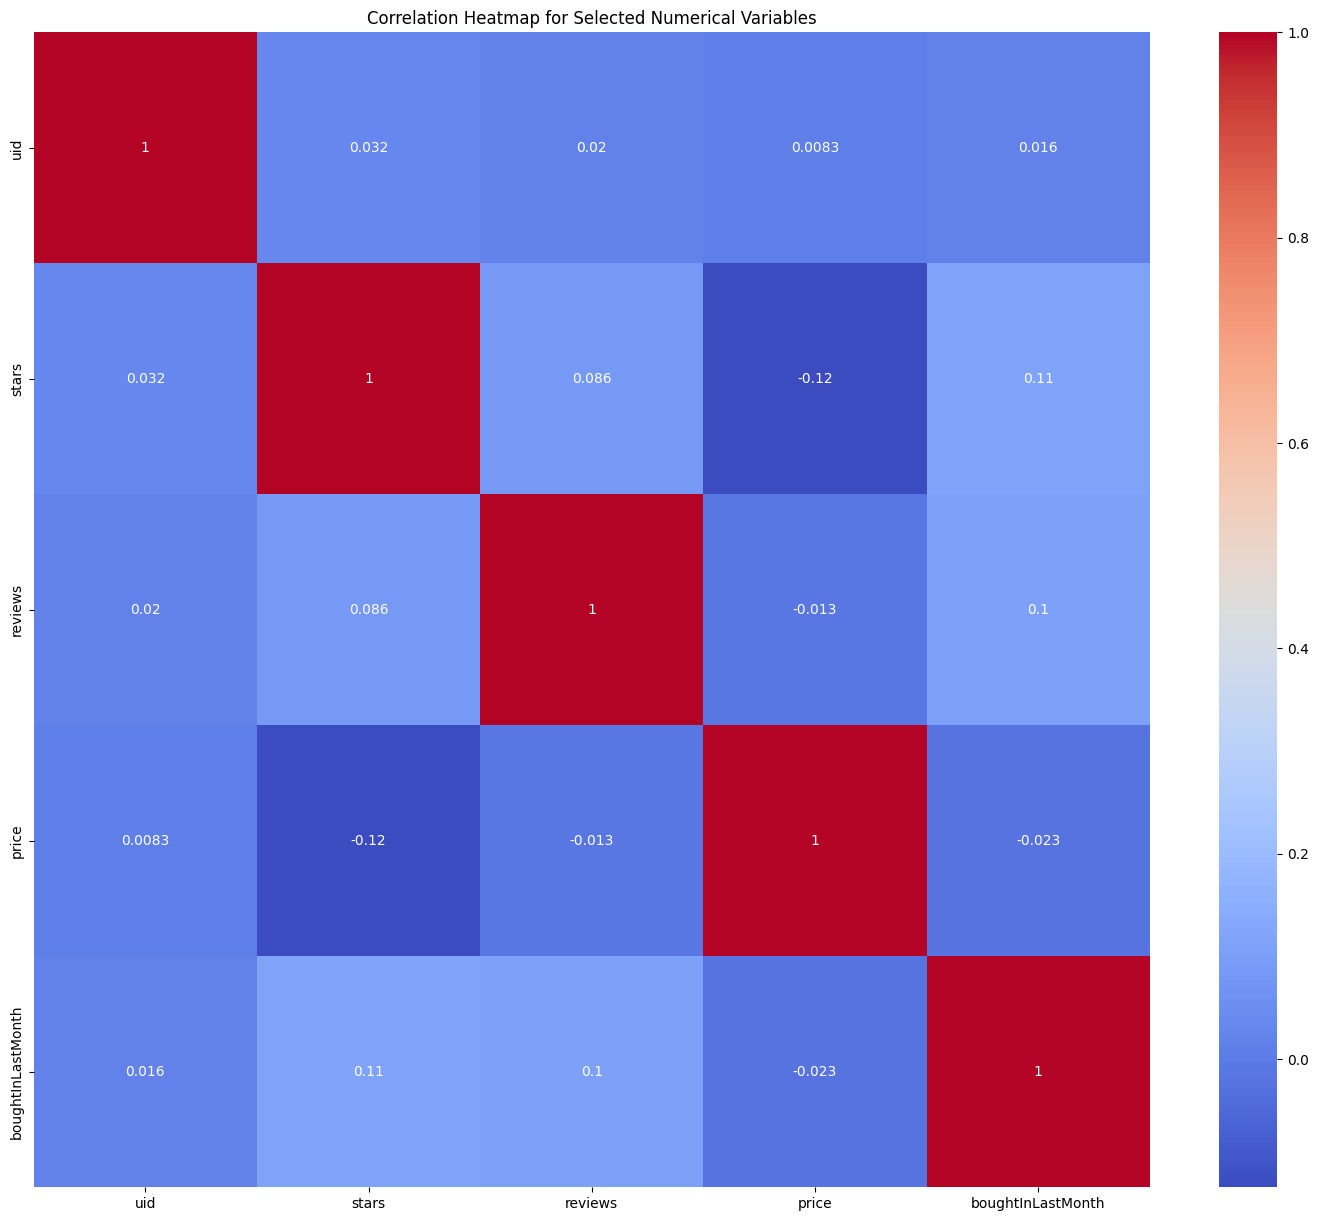

In [16]:
df_numerical = df.select_dtypes(include=[np.number])
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

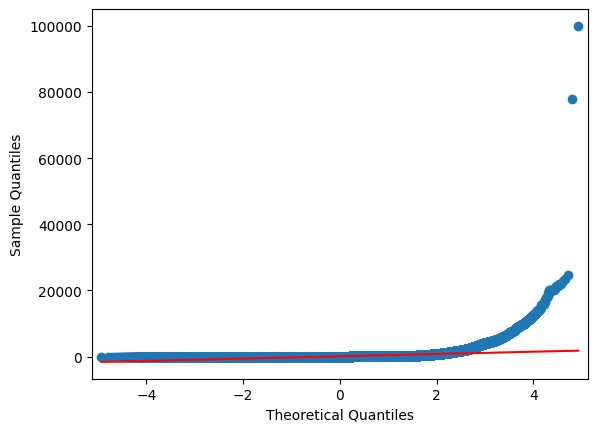

In [17]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

A: It doesn't folow a normal distribution. Positive skew.

Bonus:

Do the same analysis without taking out the outliers. What are your insights?